# Finding Heavy Traffic Indicators on I-94

In this project, we're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway. 

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. 

## 1. The I-94 Traffic Dataset

#### Loading the data

In [1]:
import pandas as pd

traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [2]:
traffic.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918

In [3]:
traffic.tail()

holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954

In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Based on our observations, we can see that our dataset consists of a total of 9 columns and 48204 rows. There are no null values in our dataset. We can also observe that 5 columns are numeric, 3 columns are categoric and 1 is datetime. 

#### Data description:

- holiday: US National holidays plus regional holiday, Minnesota State Fair
- temp: Average temp in kelvin
- rain_1h: Amount in mm of rain that  occurred in the hour
- snow_1h: Amount in mm of snow that occurred in the hour
- clouds_all: Percentage of cloud cover
- weather_main: Short textual description of the current weather
- weather_description: Longer textual description of the current weather
- date_time: Hour of the data collected in local CST time
- traffic_volume: Hourly I-94 ATR 301 reported westbound traffic volume



## 2. Analyzing Traffic Volume

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

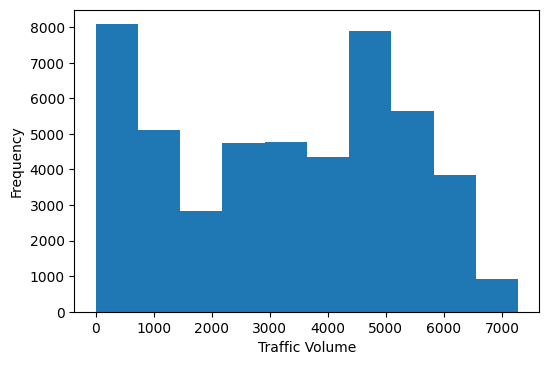

In [6]:
#Plot a histogram to examine the distribution of the traffic_volume column

traffic['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.show()

In [7]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

## 3. Traffic Volume: Day vs Night

Previously, we analyzed the distribution of traffic_volume and found the following:

- About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
- About 75% of the time, the traffic volume was four times as much (4,933 cars or more).
This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [8]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [9]:
#making a copy of our dataset to ensure we don't lose the original

traffic_i94 = traffic.copy()

In [10]:
day = traffic_i94[(traffic_i94['date_time'].dt.hour >= 7) & (traffic_i94['date_time'].dt.hour < 19)]
print(day.shape)

night = traffic_i94[(traffic_i94['date_time'].dt.hour >= 19) | (traffic_i94['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


## 4. Traffic Volume: Day vs. Night (II)

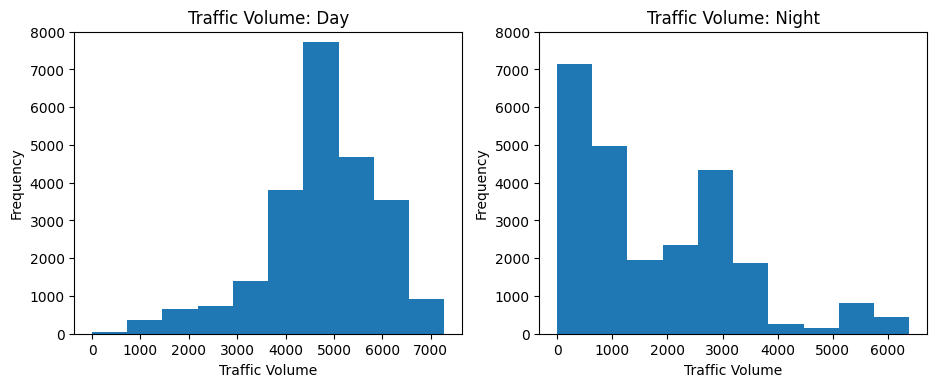

In [11]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title("Traffic Volume: Day")
plt.xlabel("Traffic Volume")
plt.ylabel('Frequency')
plt.ylim([0,8000])


plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title("Traffic Volume: Night")
plt.xlabel("Traffic Volume")
plt.ylabel('Frequency')
plt.ylim([0,8000])

plt.show()

Based on our plots above, we can observe the following:

- Our daytime histogram is skewed to the left. Traffic volumes are higher during the day.  
- Our nighttime histogram is skewed to the right. Traffic volumes are lower at night. 


In [12]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

From the above, we can observe that daytime has a higher traffic volume average (4762) than night time (1785). 

Since our goal is to find indicators of heavy traffic, we can consider dropping the night data because we can see that traffic volumes are lower at night compared to during the day. 

## 5. Time indicators

Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

In [14]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-14-b104fbd4ed31>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

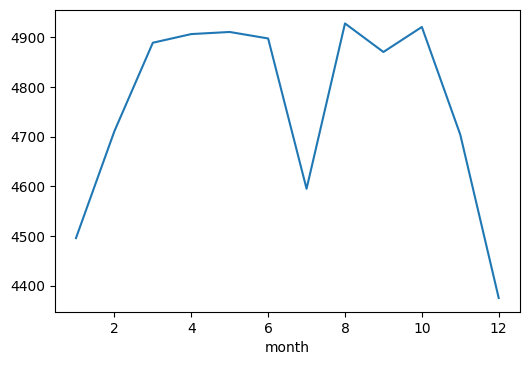

In [15]:
by_month['traffic_volume'].plot.line()
plt.show()

From our plot above, we can observe that in the first half of the year, traffic volumes are high. A sudden drop occurs in the month of June until July. Towards August, we experience a sudden rise and another massive drop in October. 

## 6. Time Indicators (II)

In [16]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
#by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-16-f3f4be4d95d3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



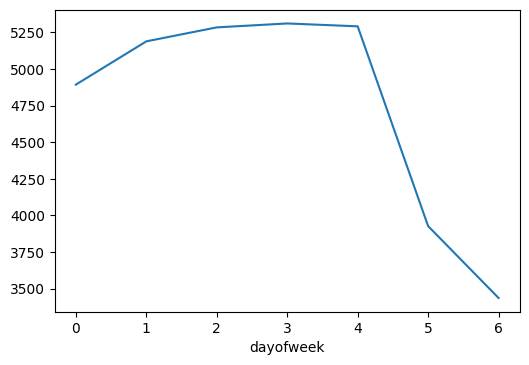

In [17]:
by_dayofweek['traffic_volume'].plot.line()
plt.show()

From our observation, we can see clearly that we have higher traffic volumes on business days and lower traffic volumes during the weekend. 

## 7. Time Indicators (III)

In [18]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()


<ipython-input-18-ed6db927f547>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



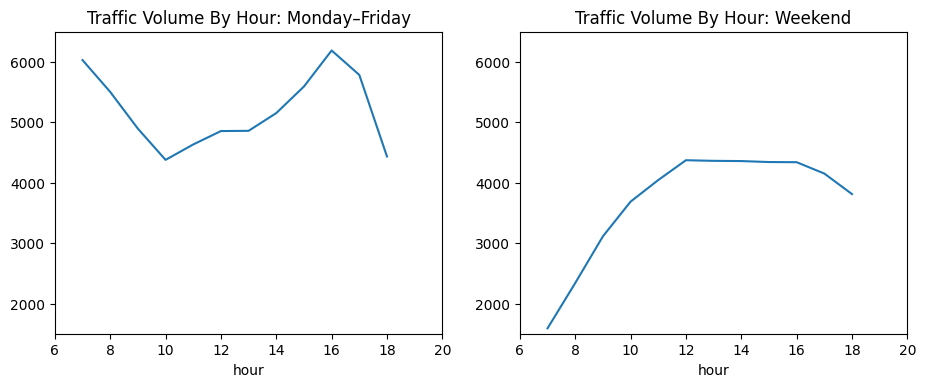

In [19]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')



plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

We've already established that business days have higher traffic volumes compared to weekends. 

On a granular level, we have compared hours on business days and weekends. Based on our plot above, we can see that on business days, traffic volumes are at their highest in the morning (around 7 a.m.) and as the afternoon begins (around 2 p.m.) until the early evening (aound 4-5 p.m.). 

We can see the opposite occur for weekends. Traffic volumes are very low in the morning and are at their highest around 12.p.m and gradually decrease as the day progresses. 

## 8. Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so we'll start by looking up their correlation values with traffic_volume.

In [20]:
traffic_i94.corr()

temp   rain_1h   snow_1h  clouds_all  traffic_volume
temp            1.000000  0.009069 -0.019755   -0.101976        0.130299
rain_1h         0.009069  1.000000 -0.000090    0.004818        0.004714
snow_1h        -0.019755 -0.000090  1.000000    0.027931        0.000733
clouds_all     -0.101976  0.004818  0.027931    1.000000        0.067054
traffic_volume  0.130299  0.004714  0.000733    0.067054        1.000000

From the above, we can observe that temperature shows the strongest correlation with a value of just +0.13.  
 

We will now plot a scatter plot for this weather column and *traffic_volume*.

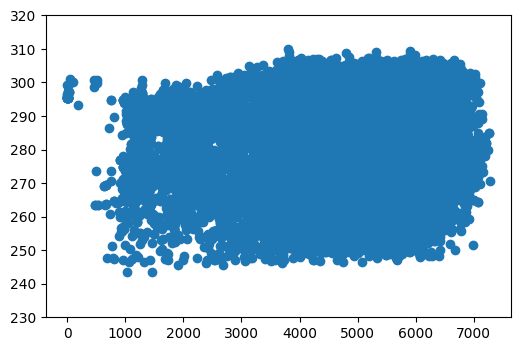

In [21]:
plt.scatter(day["traffic_volume"], day['temp'])
plt.ylim(230, 320) #two wrong 0K temperatures mess up the y-axis
plt.show()

We can see a clear strong correlation between these columns. The *temp* column doesn't seem like a reliable indicator for heavy traffic. 

Let's now look at the other weather-related columns: weather_main and weather_description.

## 9. Weather types

In [22]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()



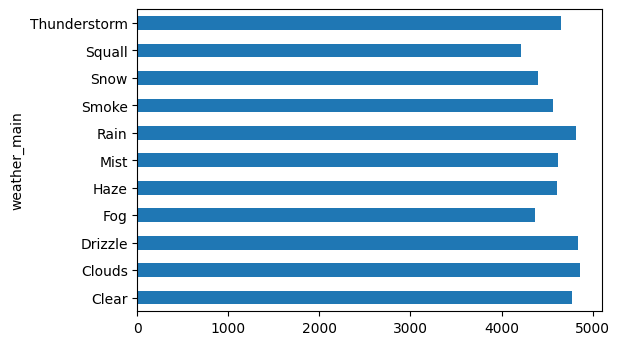

In [23]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

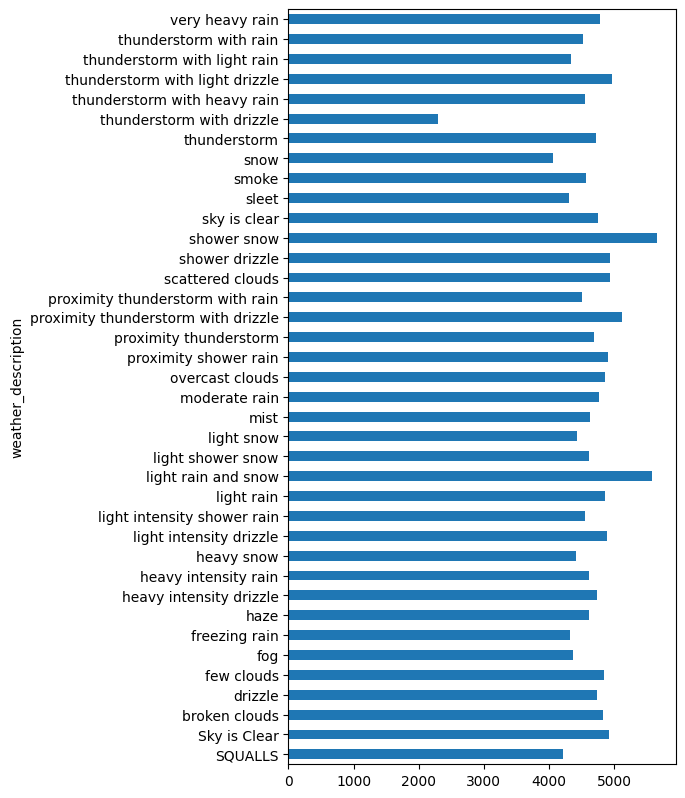

In [29]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

From the above plot we can observe that thunderstorm with the drizzle has the least impact on traffic volume. 

It looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

## 10. Conclusion